In [5]:
#load all necessary libraries
import pandas as pd 
import numpy as np 
import scipy as scp
import seaborn as sns
import random
import sklearn
#import statsmodels.api as sm
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import metrics 
from sklearn.metrics import confusion_matrix

#df_test = pd.read_spss('data/newdata/مهندسی.sav')
df_test = pd.read_excel('data/data_w_origin/GHOMOYAT.xlsx')
print(df_test.shape)
#df_test.head()

(15363, 19)


In [6]:
import re
def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

df_test['Sen']=df_test['Sen'].apply(lambda cw : remove_tags(cw))
#df_test.head()

def age_calc(string):
    year, month, day = string.split("/")
    year = 1401 - int(year)
    return year

df_test['Sen']=df_test['Sen'].apply(lambda cw : age_calc(cw))
df_test.head()

,Danshkadeh,Sen,Maghtah,Type,Moadel,Meliyat,Vaziyat Tahol,Farzandan,Sal,Komak Mali,Jensiyat,Eteghal,Enseraf,Hazf,Morakhasi,Tagher Reshteh,Mehman,Mantagheh,GDP
0,1,21,0,0,14.00,1,1,0,6,1,1,0,0,0,0,0,0,3,5
1,1,21,0,0,14.00,1,1,0,6,1,1,0,0,0,0,0,0,5,2
2,1,21,0,0,12.61,1,1,0,6,1,0,0,0,0,0,0,0,1,1
3,1,22,0,0,13.93,1,1,0,6,1,1,0,0,0,0,0,0,1,1
4,1,20,0,0,999.00,1,1,0,6,1,1,0,0,0,0,0,0,1,1


In [7]:
cols = ['Danshkadeh', 'Sen', 'Maghtah', 'Type', 'Moadel', 'Meliyat',
       'Vaziyat Tahol', 'Farzandan', 'Sal', 'Komak Mali', 'Jensiyat',
       'Eteghal', 'Enseraf', 'Hazf', 'Morakhasi', 'Tagher Reshteh', 'Mehman',
       'Mantagheh', 'GDP']
df_test.columns = cols
df_test.columns
df_test = df_test.loc[~(df_test == 999).any(axis=1)]

In [9]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13390 entries, 0 to 15362
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Danshkadeh      13390 non-null  int64  
 1   Sen             13390 non-null  int64  
 2   Maghtah         13390 non-null  int64  
 3   Type            13390 non-null  int64  
 4   Moadel          13390 non-null  float64
 5   Meliyat         13390 non-null  int64  
 6   Vaziyat Tahol   13390 non-null  int64  
 7   Farzandan       13390 non-null  int64  
 8   Sal             13390 non-null  int64  
 9   Komak Mali      13390 non-null  int64  
 10  Jensiyat        13390 non-null  int64  
 11  Eteghal         13390 non-null  int64  
 12  Enseraf         13390 non-null  int64  
 13  Hazf            13390 non-null  int64  
 14  Morakhasi       13390 non-null  int64  
 15  Tagher Reshteh  13390 non-null  int64  
 16  Mehman          13390 non-null  int64  
 17  Mantagheh       13390 non-null 

In [8]:
import pandas as pd

# create a sample data frame
df = pd.DataFrame({
    'Column1': ['A', 'B', 'C', 'A'],
    'Column2': ['X', 'Y', 'X', 'Z'],
    'Column3': ['Yes', 'No', 'Yes', 'Yes']
})
print(df)
# create a dictionary to map unique values to numbers
mapping_dict = {}
for col in df.columns:
    unique_values = df[col].unique()
    mapping_dict[col] = {value: i for i, value in enumerate(unique_values)}

# replace values in data frame with mapped values
df.replace(mapping_dict, inplace=True)

print(df)

  Column1 Column2 Column3
0       A       X     Yes
1       B       Y      No
2       C       X     Yes
3       A       Z     Yes
   Column1  Column2  Column3
0        0        0        0
1        1        1        1
2        2        0        0
3        0        2        0


## EDA

In [ ]:
'''
# create a dictionary to map unique values to numbers
mapping_dict = {}
variables = list(set(df_test.columns) - {"ID", "Sen", "Moadel", "Farzandan", "Sal"})
for col in variables:
    unique_values = df_test[col].unique()
    mapping_dict[col] = {value: i for i, value in enumerate(unique_values)}

# replace values in data frame with mapped values
df_test.replace(mapping_dict, inplace=True)
df_test.head()
'''

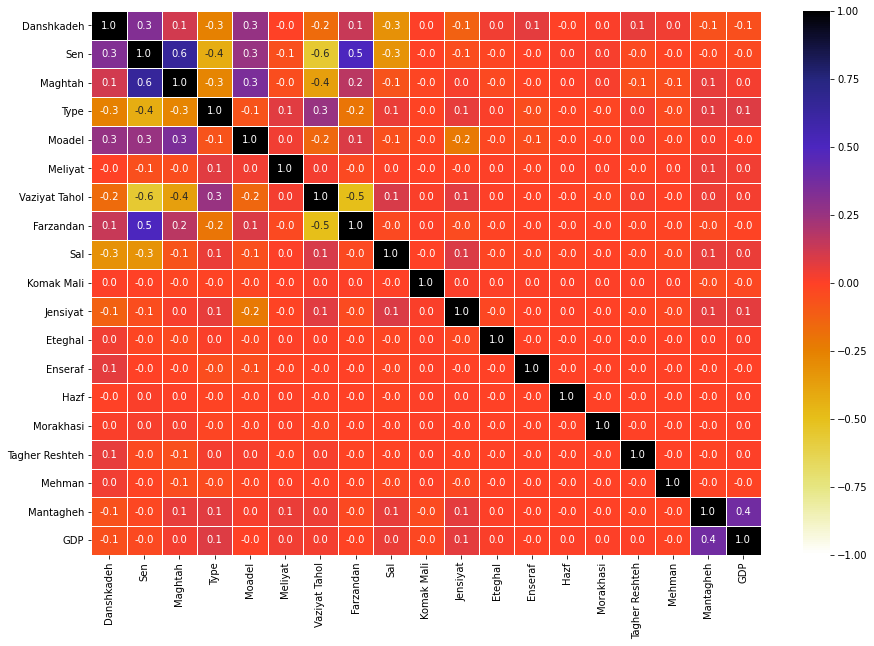

In [13]:
plt.figure(figsize=(15,10))
sns.heatmap(df_test.corr(), annot=True, linewidth=.5, vmin = -1, vmax = 1,cmap = plt.cm.CMRmap_r, fmt=".1f");

<Axes: >

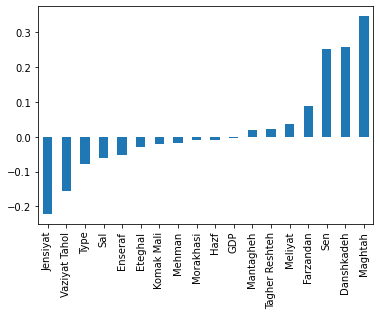

In [37]:
df_test.corr()['Moadel'].sort_values()[:-1].plot(kind='bar')

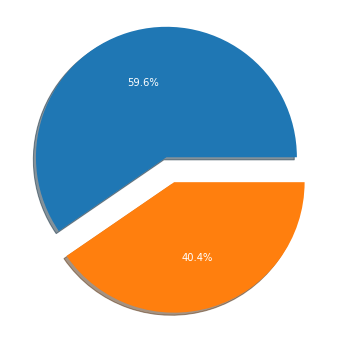

In [24]:
plt.figure(figsize=(8,6))
counts_male = df_test[df_test['Jensiyat']==1].shape[0]
counts_female = df_test[df_test['Jensiyat']==0].shape[0]
plt.pie([counts_male, counts_female], explode=[0.1,0.1], shadow=True, labels=['Male ','Female'], textprops={'color':"w"}, autopct='%4.1f%%');

In [14]:
df_test.dropna(inplace=True)
df_test.isna().sum()

Danshkadeh        0
Sen               0
Maghtah           0
Type              0
Moadel            0
Meliyat           0
Vaziyat Tahol     0
Farzandan         0
Sal               0
Komak Mali        0
Jensiyat          0
Eteghal           0
Enseraf           0
Hazf              0
Morakhasi         0
Tagher Reshteh    0
Mehman            0
Mantagheh         0
GDP               0
dtype: int64

## Model for Decisions

In [ ]:
X = df_test.drop(['Leave', 'Remove', 'newClass', 'Tasmim'], axis=1) 
y = df_test['newClass']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

model1 = LogisticRegression(random_state=0, multi_class='multinomial', penalty='none', solver='newton-cg').fit(X_train, y_train)
preds = model1.predict(X_test)

#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = model1.get_params()
print(params)

#Print model parameters
#print('Intercept: \n', model1.intercept_)
#print('Coefficients: \n', model1.coef_)

#Create a confusion matrix
#y_test as first argument and the preds as second argument 
confusion_matrix(y_test, preds)

#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_test, preds))

#Accuracy statistics

print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

#Create classification report
class_report=classification_report(y_test, preds)
print(class_report)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

X = df_test.drop(['Leave', 'Remove', 'newClass', 'Tasmim', 'ID'], axis=1) 
y = df_test['newClass']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

## Model for GPA

In [29]:
df_test.head(1)

,Danshkadeh,Sen,Maghtah,Type,Moadel,Meliyat,Vaziyat Tahol,Farzandan,Sal,Komak Mali,Jensiyat,Eteghal,Enseraf,Hazf,Morakhasi,Tagher Reshteh,Mehman,Mantagheh,GDP
0,1,21,0,0,14.0,1,1,0,6,1,1,0,0,0,0,0,0,3,5


Columns for training: ['Danshkadeh', 'Sen', 'Maghtah', 'Type', 'Meliyat', 'Vaziyat Tahol', 'Farzandan', 'Sal', 'Komak Mali', 'Jensiyat', 'Eteghal', 'Enseraf', 'Hazf', 'Morakhasi', 'Tagher Reshteh', 'Mehman', 'Mantagheh', 'GDP']


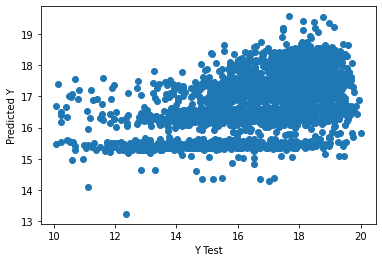

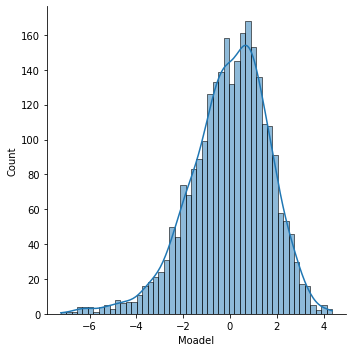

In [31]:
from sklearn.preprocessing import StandardScaler

X = df_test.drop(['Moadel'], axis=1) 
y = df_test['Moadel']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
scaler = StandardScaler()
X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict(X_test)
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
#plt.plot(y_test,y_test,'r')

sns.displot((y_test-predictions),bins=50, kde=True);

In [32]:
coeff_df = pd.DataFrame(lm.coef_,index=X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
Danshkadeh,0.449587
Sen,-0.063928
Maghtah,0.710540
Type,0.142874
Meliyat,0.092417
Vaziyat Tahol,0.014657
Farzandan,0.051501
Sal,0.081991
Komak Mali,-0.021300
Jensiyat,-0.409895


In [33]:
# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 1.312237830188782
MSE: 2.8117264565534517
RMSE: 1.6768203411676075


## NN for Regression

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(1))

# early stopping callback
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, mode='min')

model.compile(optimizer='adam',loss='mse')
model.fit(x=X_train,y=y_train.values,
          validation_data=(X_test,y_test.values),
          batch_size=128,epochs=100, verbose=False, callbacks=[early_stopping])

<Axes: >

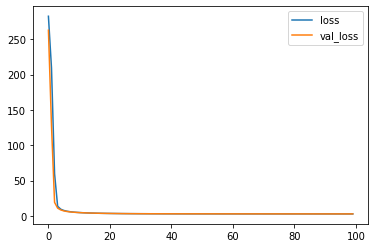

In [43]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [39]:
NN_pred = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

84/84 [==============================] - 0s 1ms/step
MAE: 1.2155863219325982
MSE: 2.5143682455102883
RMSE: 1.5856759585458462


84/84 [==============================] - 0s 2ms/step


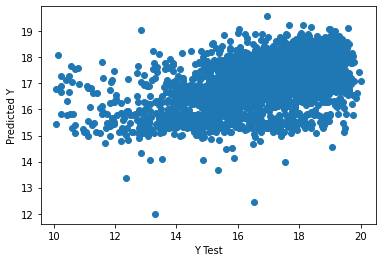

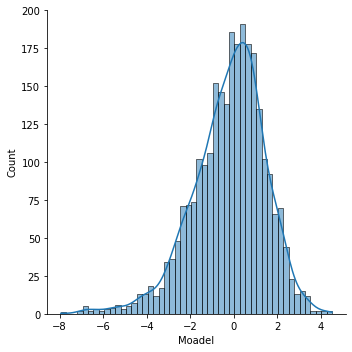

In [44]:
predictions = model.predict(X_test)
predictions = predictions.reshape(predictions.shape[0])
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
#plt.plot(y_test,y_test,'r')
sns.displot((y_test-predictions),bins=50, kde=True);

## Gender 

<AxesSubplot:>

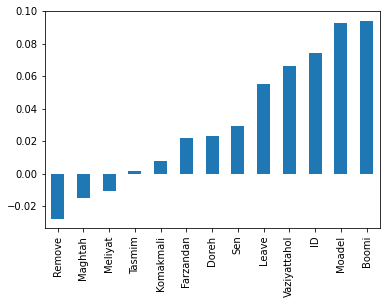

In [192]:
df_test.corr()['Jensiyat'].sort_values()[:-1].plot(kind='bar')

In [58]:
X = df_test.drop(['Jensiyat'], axis=1) 
y = df_test['Jensiyat']
#y=y.astype('object')

print("Columns for training:", list(X.columns.values)) 

X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size = 0.20, random_state = 5)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
preds = logmodel.predict(X_test)

#print the tunable parameters (They were not tuned in this example, everything kept as default)
params = logmodel.get_params()
print(params)

#Print model parameters
print('Intercept: \n', logmodel.intercept_)
print('Coefficients: \n', logmodel.coef_)

#Create a confusion matrix
#y_test as first argument and the preds as second argument 
confusion_matrix(y_test, preds)

#transform confusion matrix into array
#the matrix is stored in a vaiable called confmtrx
confmtrx = np.array(confusion_matrix(y_test, preds))

#Accuracy statistics

print('Accuracy Score:', metrics.accuracy_score(y_test, preds))  

#Create classification report
class_report=classification_report(y_test, preds)
print(class_report)

print(logmodel.score(X_test, y_test))
print(logmodel.score(X_train, y_train))

Columns for training: ['Danshkadeh', 'Sen', 'Maghtah', 'Type', 'Moadel', 'Meliyat', 'Vaziyat Tahol', 'Farzandan', 'Sal', 'Komak Mali', 'Eteghal', 'Enseraf', 'Hazf', 'Morakhasi', 'Tagher Reshteh', 'Mehman', 'Mantagheh', 'GDP']
(10712, 18)
(2678, 18)
(10712,)
(2678,)
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
Intercept: 
 [1.63999582]
Coefficients: 
 [[-0.05581912  0.01768271  0.39034648  0.2767897  -0.2762041   0.36709089
   0.40007305 -0.12546686  0.10264683  1.25773777 -0.3828093  -0.28923064
  -0.05809022 -0.24891339  0.12170778 -0.23873763  0.05337547  0.06618131]]
Accuracy Score: 0.6366691560866318
              precision    recall  f1-score   support

           0       0.59      0.38      0.46      1104
           1       0.65      0.82      0.73    

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [66]:
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
# Binary classification
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)
history = model.fit(x=X_train, y=y_train, epochs=300, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/300
335/335 [==============================] - 1s 2ms/step - loss: 0.7729 - accuracy: 0.5535 - val_loss: 0.6731 - val_accuracy: 0.5885
Epoch 2/300
335/335 [==============================] - 0s 1ms/step - loss: 0.6576 - accuracy: 0.6175 - val_loss: 0.6554 - val_accuracy: 0.6154
Epoch 3/300
335/335 [==============================] - 0s 1ms/step - loss: 0.6509 - accuracy: 0.6245 - val_loss: 0.6555 - val_accuracy: 0.6247
Epoch 4/300
335/335 [==============================] - 1s 2ms/step - loss: 0.6491 - accuracy: 0.6316 - val_loss: 0.6541 - val_accuracy: 0.6273
Epoch 5/300
335/335 [==============================] - 0s 1ms/step - loss: 0.6450 - accuracy: 0.6330 - val_loss: 0.6486 - val_accuracy: 0.6307
Epoch 6/300
335/335 [==============================] - 0s 1ms/step - loss: 0.6427 - accuracy: 0.6376 - val_loss: 0.6493 - val_accuracy: 0.6303
Epoch 7/300
335/335 [==============================] - 0s 1ms/step - loss: 0.6406 - accuracy: 0.6397 - val_loss: 0.6457 - val_accuracy: 0.6355

335/335 [==============================] - 0s 737us/step


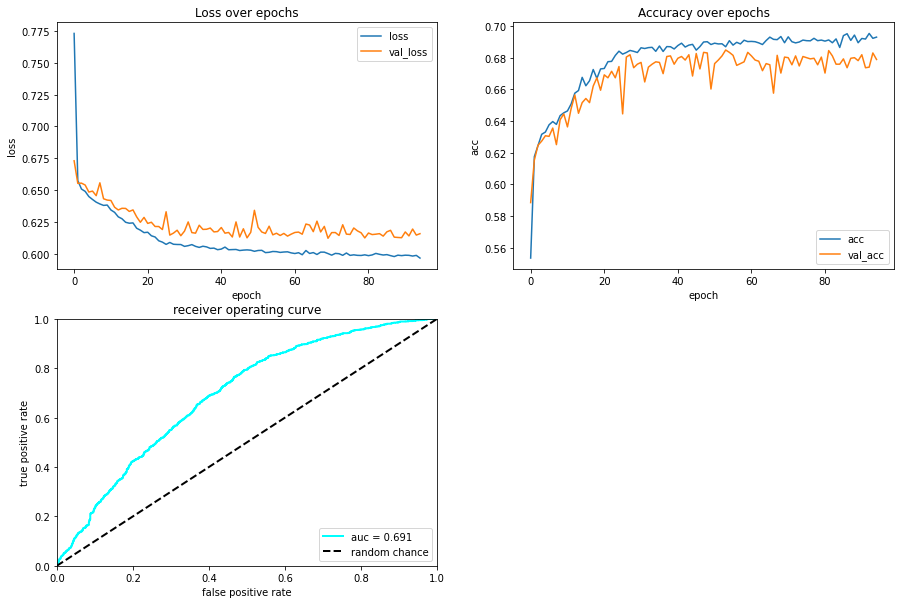

In [67]:
from sklearn.metrics import roc_curve, auc, classification_report, accuracy_score, confusion_matrix

%matplotlib inline
def loss_accuracy_plotter(history):
    # plot loss vs epoch
    plt.figure(figsize=(15,10))
    ax = plt.subplot(2, 2, 1)
    ax.plot(history.history['loss'], label='loss')
    ax.plot(history.history['val_loss'], label='val_loss')
    ax.legend(loc="upper right")
    ax.set_title('Loss over epochs')
    ax.set_xlabel('epoch')
    ax.set_ylabel('loss')

    # plot accuracy vs epoch
    ax = plt.subplot(2, 2, 2)
    ax.plot(history.history['accuracy'], label='acc')
    ax.plot(history.history['val_accuracy'], label='val_acc')
    ax.legend(loc="lower right")
    ax.set_title('Accuracy over epochs')
    ax.set_xlabel('epoch')
    ax.set_ylabel('acc')

    # Plot ROC
    Y_predict = model.predict(X_test)
    Y_predict_train = model.predict(X_train)
    fpr, tpr, thresholds = roc_curve(y_test, Y_predict)
    roc_auc = auc(fpr, tpr)
    ax = plt.subplot(2, 2, 3)
    ax.plot(fpr, tpr, lw=2, color='cyan', label='auc = %.3f' % (roc_auc))
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='random chance')
    ax.set_xlim([0, 1.0])
    ax.set_ylim([0, 1.0])
    ax.set_xlabel('false positive rate')
    ax.set_ylabel('true positive rate')
    ax.set_title('receiver operating curve')
    ax.legend(loc="lower right")
    plt.show()

loss_accuracy_plotter(history)

In [54]:
#predictions = model.predict_classes(X_test)
predictions = model.predict(X_test).round()
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

84/84 [==============================] - 0s 877us/step
              precision    recall  f1-score   support

           0       0.69      0.41      0.51      1104
           1       0.68      0.87      0.76      1574

    accuracy                           0.68      2678
   macro avg       0.68      0.64      0.64      2678
weighted avg       0.68      0.68      0.66      2678

[[ 449  655]
 [ 206 1368]]


In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

rfc_pred = rfc.predict(X_test)
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.50      0.49      0.50      1104
           1       0.65      0.65      0.65      1574

    accuracy                           0.59      2678
   macro avg       0.57      0.57      0.57      2678
weighted avg       0.59      0.59      0.59      2678

[[ 543  561]
 [ 545 1029]]
              precision    recall  f1-score   support

           0       0.55      0.51      0.53      1104
           1       0.67      0.71      0.69      1574

    accuracy                           0.63      2678
   macro avg       0.61      0.61      0.61      2678
weighted avg       0.62      0.63      0.62      2678

[[ 558  546]
 [ 456 1118]]
